In [1]:
from pyrootmemo.fit.fit_xy_powerlaw import PowerlawFitWeibull, PowerlawFitGamma, PowerlawFitGumbel, PowerlawFitUniform, PowerlawFitLognormal, PowerlawFitLognormalUncorrected, PowerlawFitNormal, PowerlawFitNormalForce, PowerlawFitNormalScaled, PowerlawFitNormalFreesd
import numpy as np
from pyrootmemo.tools.helpers import units
import matplotlib.pyplot as plt

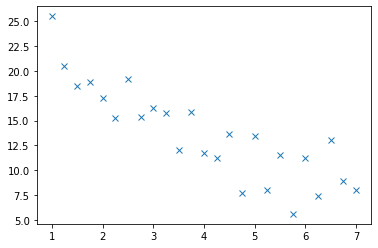

In [2]:
# generate data
rng = np.random.default_rng()
sd_multiplier = 2.0
x = np.linspace(1, 7, 25)
random_factor = rng.normal(0.0, sd_multiplier, size = len(x))
y = np.abs(25 * x**(-0.5) + random_factor)
w = rng.uniform(0.8, 1.2, len(x))
# with units - generate
xu = x * units("mm")
yu = y * units("MPa")
# show
plt.plot(x, y, 'x')

1.0 millimeter
1.0 megapascal
24.37965975995347 megapascal
-0.4938884017130963
4.554178917944675 megapascal
-0.4938884017130963
(<Quantity([1.  2.5 4.  5.5 7. ], 'millimeter')>, <Quantity([[19.89593099 28.86338853]
 [14.17564719 16.83563202]
 [11.36368092 13.22341237]
 [ 9.49609941 11.51269304]
 [ 8.20855905 10.44121248]], 'megapascal')>)


True

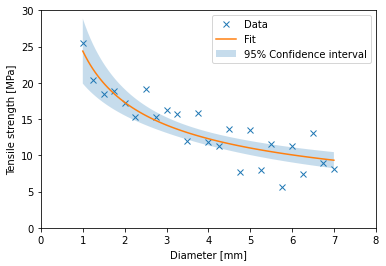

In [3]:
# Normal - strength
N = PowerlawFitNormalScaled(xu, yu)
print(N.x0)
print(N.y0)
print(N.multiplier)
print(N.exponent)
print(N.sd_multiplier)
print(N.sd_exponent)
# print(N.random(np.array([2, 3, 4]) * units('mm')))
# print(N.density())
# print(N.density(cumulative = True))
# print(N.ks_distance())
# print(N.loglikelihood(deriv = 0))
# print(N.loglikelihood(deriv = 1))
# print(N.loglikelihood(deriv = 2))
# print(N.covariance())
# print(N.covariance(method = 'bootstrap', n = 1000))
# print(N.prediction_interval(n = 5))
print(N.confidence_interval(n = 5))
# xc, yc = N.confidence_interval(n = 5)
# from pint import Quantity
# print(isinstance(yc, Quantity))
# xp = np.linspace(np.min(N.x), np.max(N.x), 10)
# print(N.predict(xp))
# print(isinstance(xp, Quantity))
N.plot()
hasattr(N, 'confidence_interval')

1.0 millimeter
1.0 megapascal
26.34154738339418 megapascal
-0.5548701353487022
0.20054549275866163
0.797072991581725
[[ 7.08952199e+00 -1.79631883e-01  4.24922762e-03]
 [-1.79631883e-01  5.42239289e-03  1.13255869e-17]
 [ 4.24922762e-03  8.11855525e-18  8.04369893e-04]]
[[ 4.39555572e+00 -1.40826181e-01  2.80421057e-02]
 [-1.40826181e-01  5.58677909e-03 -1.07321615e-03]
 [ 2.80421057e-02 -1.07321615e-03  1.09419702e-03]]


(<Figure size 432x288 with 1 Axes>,
 <Axes: xlabel='Diameter [mm]', ylabel='Tensile strength [MPa]'>)

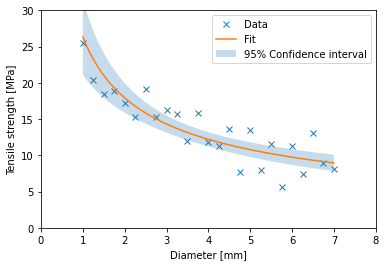

In [4]:
# Lognormal
L = PowerlawFitLognormal(xu, yu)
print(L.x0)
print(L.y0)
print(L.multiplier)
print(L.exponent)
print(L.sdlog)
#print(L.random(np.array([2, 3, 4]) * units('mm')))
#print(L.density())
#print(L.density(cumulative = True))
print(L.ks_distance())
#print(L.loglikelihood(deriv = 0))
#print(L.loglikelihood(deriv = 1))
#print(L.loglikelihood(deriv = 2))
print(L.covariance())
print(L.covariance(method = 'bootstrap', n = 100))
#print(L.prediction_interval(n = 5))
#print(L.confidence_interval(n = 5))
L.plot()


1.0 millimeter
1.0 megapascal
19.547890442387434 megapascal
-0.4032004135406138
16.308288749707387 megapascal
[16.597123620204258 9.503606115831287 15.586257433946464] megapascal
0.863533407550673
-57.114964413598514
-23.081104408062693
None
[[ 3.31323726e+01 -8.45832715e-01  1.43590851e+01]
 [-8.45832715e-01  2.28389784e-02 -4.10246689e-01]
 [ 1.43590851e+01 -4.10246689e-01  1.34676333e+01]]
[[ 1.47729251e+01 -4.18265401e-01  6.19225480e+00]
 [-4.18265401e-01  1.26721986e-02 -2.26171276e-01]
 [ 6.19225480e+00 -2.26171276e-01  7.35988706e+00]]
(<Quantity([1.  2.5 4.  5.5 7. ], 'millimeter')>, <Quantity([[11.80145329 27.2943276 ]
 [ 8.15616336 18.86352378]
 [ 6.74814886 15.60707662]
 [ 5.93500309 13.72643814]
 [ 5.38507322 12.45456377]], 'megapascal')>)
(<Quantity([1.  2.5 4.  5.5 7. ], 'millimeter')>, <Quantity([[10.5589156  28.53686528]
 [10.31970524 16.69998189]
 [ 9.6612481  12.69397737]
 [ 8.8738404  10.78760083]
 [ 7.96258678  9.87705021]], 'megapascal')>)


(<Figure size 432x288 with 1 Axes>,
 <Axes: xlabel='Diameter [mm]', ylabel='Tensile strength [MPa]'>)

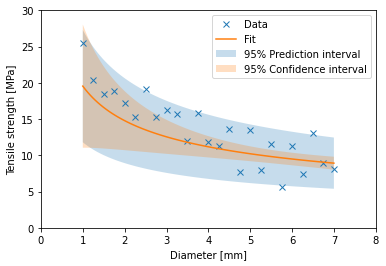

In [5]:
# Uniform
U = PowerlawFitUniform(xu, yu)
print(U.x0)
print(U.y0)
#print(U.x)
#print(U.y)
#print(U.weights)
print(U.multiplier)
print(U.exponent)
print(U.width)
print(U.random(np.array([2, 3, 4]) * units('mm')))
#print(U.density())
#print(U.density(cumulative = True))
print(U.ks_distance())
print(U.loglikelihood(deriv = 0))
print(U.loglikelihood(deriv = 1))
print(U.loglikelihood(deriv = 2))
print(U.covariance())
print(U.covariance(method = 'bootstrap', n = 100))
print(U.prediction_interval(n = 5))
print(U.confidence_interval(n = 5))
U.plot(prediction = True)

In [6]:
# Gumbel
Gb = PowerlawFitGumbel(xu, yu)
print(Gb.x0)
print(Gb.y0)
print(Gb.multiplier)
print(Gb.exponent)
print(Gb.scale0)
print(Gb.random(np.array([2, 3, 4]) * units('mm')))
#print(Gb.density())
#print(Gb.density(cumulative = True))
print(Gb.ks_distance())
#print(Gb.loglikelihood(deriv = 0))
#print(Gb.loglikelihood(deriv = 1))
#print(Gb.loglikelihood(deriv = 2))
print(Gb.covariance())
print(Gb.covariance(method = 'bootstrap', n = 100))
print(Gb.prediction_interval(n = 5))
print(Gb.confidence_interval(n = 5))

1.0 millimeter
1.0 megapascal
27.95356553239257 megapascal
-0.5933832666909432
5.15809784352717 megapascal
[15.89706853441194 21.308185335282538 9.946744395804753] megapascal
0.7970343932479212
[[ 8.67773248e+00 -2.06891219e-01  1.57094793e+00]
 [-2.06891219e-01  6.13227868e-03 -2.88739879e-02]
 [ 1.57094793e+00 -2.88739879e-02  6.98274320e-01]]
[[ 1.05567686e+04 -3.66386816e+01  7.50960238e+03]
 [-3.66386816e+01  1.43650726e-01 -2.21803437e+01]
 [ 7.50960238e+03 -2.21803437e+01  6.76985383e+03]]
(<Quantity([1.  2.5 4.  5.5 7. ], 'millimeter')>, <Quantity([[18.24324824 43.93867371]
 [10.59183546 25.51032557]
 [ 8.01400932 19.30165813]
 [ 6.63412021 15.97820954]
 [ 5.74956691 13.84777211]], 'megapascal')>)
(<Quantity([1.  2.5 4.  5.5 7. ], 'millimeter')>, <Quantity([[22.17990534 33.72722572]
 [14.57957814 17.87950619]
 [11.10798963 13.45124805]
 [ 8.95462754 11.37588724]
 [ 7.5268475  10.0929199 ]], 'megapascal')>)


In [7]:
# gamma
G = PowerlawFitGamma(xu, yu)
print(G.multiplier)
print(G.exponent)
print(G.shape)
print(G.x0)
print(G.y0)
#print(G.random(np.array([2, 3, 4]) * units('mm')))
#print(G.density())
#print(G.density(cumulative = True))
print(G.ks_distance())
#print(G.loglikelihood(deriv = 0))
#print(G.loglikelihood(deriv = 1))
#print(G.loglikelihood(deriv = 2))
print(G.covariance())
print(G.covariance(method = 'bootstrap', n = 100))
#print(G.prediction_interval(n = 5))
#print(G.confidence_interval(n = 5))



25.61095977167122 megapascal
-0.5332435243607206
26.233938628824514
1.0 millimeter
1.0 megapascal
0.7959982882423923
[[ 6.52561045e+00 -1.71551504e-01  9.94056557e-14]
 [-1.71551504e-01  5.32620059e-03 -3.08627118e-15]
 [ 9.94056557e-14 -3.08627118e-15  5.43669666e+01]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]


\\myfiles.campus.bath.ac.uk\gjm36\dos\Projects\2023_root_reinforcement_book_Anil_Yildiz\pyrootmemo\src\pyrootmemo\fit\fit_xy_powerlaw.py:750: RuntimeWarning: overflow encountered in power
  c4 = np.sum(weights * yn * xn**(-exponent))
\\myfiles.campus.bath.ac.uk\gjm36\dos\Projects\2023_root_reinforcement_book_Anil_Yildiz\pyrootmemo\src\pyrootmemo\fit\fit_xy_powerlaw.py:751: RuntimeWarning: overflow encountered in power
  c5 = np.sum(weights * yn * xn**(-exponent) * np.log(xn))
\\myfiles.campus.bath.ac.uk\gjm36\dos\Projects\2023_root_reinforcement_book_Anil_Yildiz\pyrootmemo\src\pyrootmemo\fit\fit_xy_powerlaw.py:753: RuntimeWarning: invalid value encountered in scalar divide
  root = c1 * c5 / c4 - c2
\\myfiles.campus.bath.ac.uk\gjm36\dos\Projects\2023_root_reinforcement_book_Anil_Yildiz\pyrootmemo\src\pyrootmemo\fit\fit_xy_powerlaw.py:759: RuntimeWarning: overflow encountered in power
  c6 = np.sum(weights * yn * xn**(-exponent) * np.log(xn)**2)
\\myfiles.campus.bath.ac.uk\gjm36\dos\Pro

In [8]:
# Weibull
P = PowerlawFitWeibull(x, y)
print(P.colinear)
print(P.multiplier)
print(P.exponent)
print(P.shape)
print(P.x0)
print(P.y0)
print(P.random(np.array([2, 3, 4])))
print(P.ks_distance())
print(P.covariance())
print(P.covariance(method = 'bootstrap'))
print(P.confidence_interval())

False
23.142340176649284
-0.4504632634455735
6.471082748637046
1.0
1.0
[22.44450908 12.04496142 14.5221745 ]
0.817084462760905
[[ 3.64743913 -0.10575161  0.14042862]
 [-0.10575161  0.00378984  0.01101165]
 [ 0.14042862  0.01101165  1.11566779]]


\\myfiles.campus.bath.ac.uk\gjm36\dos\Projects\2023_root_reinforcement_book_Anil_Yildiz\pyrootmemo\src\pyrootmemo\fit\fit_xy_powerlaw.py:444: RuntimeWarning: overflow encountered in scalar power
  + (exponent * c5 - c6)**2 / c4**2) * c1
\\myfiles.campus.bath.ac.uk\gjm36\dos\Projects\2023_root_reinforcement_book_Anil_Yildiz\pyrootmemo\src\pyrootmemo\fit\fit_xy_powerlaw.py:444: RuntimeWarning: invalid value encountered in scalar divide
  + (exponent * c5 - c6)**2 / c4**2) * c1


[[ 2.22386836 -0.08054398 -0.22980272]
 [-0.08054398  0.00396567  0.03439708]
 [-0.22980272  0.03439708  1.53540409]]
(array([1.  , 1.06, 1.12, 1.18, 1.24, 1.3 , 1.36, 1.42, 1.48, 1.54, 1.6 ,
       1.66, 1.72, 1.78, 1.84, 1.9 , 1.96, 2.02, 2.08, 2.14, 2.2 , 2.26,
       2.32, 2.38, 2.44, 2.5 , 2.56, 2.62, 2.68, 2.74, 2.8 , 2.86, 2.92,
       2.98, 3.04, 3.1 , 3.16, 3.22, 3.28, 3.34, 3.4 , 3.46, 3.52, 3.58,
       3.64, 3.7 , 3.76, 3.82, 3.88, 3.94, 4.  , 4.06, 4.12, 4.18, 4.24,
       4.3 , 4.36, 4.42, 4.48, 4.54, 4.6 , 4.66, 4.72, 4.78, 4.84, 4.9 ,
       4.96, 5.02, 5.08, 5.14, 5.2 , 5.26, 5.32, 5.38, 5.44, 5.5 , 5.56,
       5.62, 5.68, 5.74, 5.8 , 5.86, 5.92, 5.98, 6.04, 6.1 , 6.16, 6.22,
       6.28, 6.34, 6.4 , 6.46, 6.52, 6.58, 6.64, 6.7 , 6.76, 6.82, 6.88,
       6.94, 7.  ]), array([[19.39914806, 26.88553229],
       [19.03845529, 26.04715016],
       [18.70151017, 25.27961722],
       [18.38554006, 24.57374699],
       [18.08820722, 23.92194272],
       [17.80752343, 23.3178

In [9]:
# Weibull with units
Pu = PowerlawFitWeibull(xu, yu)
print(Pu.x0)
print(Pu.y0)
print(Pu.colinear)
print(Pu.multiplier)
print(Pu.exponent)
print(Pu.shape)
print(Pu.random(np.array([2, 3, 4]) * units("mm")))
print(Pu.ks_distance())
print(Pu.xrange())
print(Pu.predict())
print(Pu.get_scale(Pu.xrange()))
print(Pu.prediction_interval(level = 0.5))
print(Pu.covariance())
print(Pu.covariance(method = 'bootstrap'))
print(Pu.confidence_interval())


1.0 millimeter
1.0 megapascal
False
23.142340176649284 megapascal
-0.4504632634455735
6.471082748637046
[19.379959216618147 14.559796443171344 14.00451713008052] megapascal
0.817084462760905
[1.0 1.06 1.12 1.18 1.24 1.3 1.3599999999999999 1.42 1.48 1.54 1.6 1.66 1.72 1.78 1.8399999999999999 1.9 1.96 2.02 2.08 2.1399999999999997 2.2 2.26 2.32 2.38 2.44 2.5 2.56 2.62 2.6799999999999997 2.74 2.8 2.86 2.92 2.98 3.04 3.1 3.16 3.2199999999999998 3.28 3.34 3.4 3.46 3.52 3.58 3.6399999999999997 3.6999999999999997 3.76 3.82 3.88 3.94 4.0 4.0600000000000005 4.12 4.18 4.24 4.3 4.359999999999999 4.42 4.48 4.54 4.6 4.66 4.72 4.779999999999999 4.84 4.9 4.96 5.02 5.08 5.14 5.2 5.26 5.32 5.38 5.4399999999999995 5.5 5.56 5.62 5.68 5.74 5.8 5.859999999999999 5.92 5.9799999999999995 6.04 6.1 6.16 6.22 6.279999999999999 6.34 6.3999999999999995 6.46 6.52 6.58 6.64 6.7 6.76 6.819999999999999 6.88 6.9399999999999995 7.0] millimeter
[23.142340176649284 20.929211771825123 19.279005618913693 17.98570892197058 1

c:\Users\gjm36\AppData\Local\miniforge3\envs\rrmm\Lib\site-packages\matplotlib\cbook.py:1398: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
c:\Users\gjm36\AppData\Local\miniforge3\envs\rrmm\Lib\site-packages\numpy\ma\core.py:2414: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = np.array(a, copy=None, subok=True)


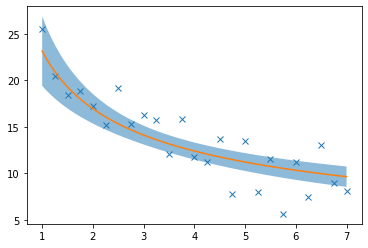

In [10]:
# test with plot
xf = Pu.xrange()
yf = Pu.predict(xf)
xc,yc = Pu.confidence_interval()
plt.plot(Pu.x, Pu.y, 'x')
plt.plot(xf, yf, '-')
plt.fill_between(xc, *yc.transpose(), alpha = 0.5)